# Bankruptcy Prediction of American businesses


#### In this project, i will be doing mostly build a model and less or exploration.
#### The Aim of this work is to build/train a classification model to predict whether a company would go bankrupt or not, based on the features given to it. I will be using two Ensemble models (RandomForestclassifier and GradientBoostingClassifier). 

##### Credits to Kaggle for this dataset
##### Kindly check the Dataset Dictionary to know the meaning of the columns i.e X1, X2, etc
As i go further in the process, there will be more explanation on each process. 
If you are interested in just the end result, kindly skip to the end of this project. 

### Exploratory Analysis


**Library Imports**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# import other useful libraries
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns

##### Let's see what the dataset entails

In [8]:
df = pd.read_csv("C:/Users/HP/Documents/Stephen/DataScience_projects/american_bankruptcy.csv").set_index("company_name")
df.head(10)

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
company_name,,,,,,,,,,,,,,,,,,,,
C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
C_1,alive,2004,474.542,598.172,27.950,61.774,255.477,15.453,127.121,522.6794,747.848,732.230,227.159,33.824,149.676,160.025,142.450,747.848,417.486,686.074
C_1,alive,2005,624.454,704.081,29.222,91.877,323.592,35.163,136.272,882.6283,897.284,978.819,318.576,62.655,193.203,187.788,183.550,897.284,556.102,805.407
C_1,alive,2006,645.721,837.171,32.199,118.907,342.593,58.660,181.691,1226.1925,1061.169,1067.633,253.611,86.708,223.998,256.506,242.153,1061.169,573.390,942.262
C_1,alive,2007,783.431,1080.895,39.952,168.522,435.608,75.144,202.472,747.5434,1384.919,1362.010,507.918,128.570,304.024,218.499,318.184,1384.919,776.755,1216.397


In [9]:
# Number of observations
len(df)

78682

In [10]:
# Number of observations per company
df.index.value_counts()

company_name
C_4081    20
C_6487    20
C_1153    20
C_4047    20
C_4056    20
          ..
C_1498     1
C_5908     1
C_2814     1
C_3997     1
C_3408     1
Name: count, Length: 8971, dtype: int64

It seems like the different companies have varying number of observations, But i would like to work with just one observation of each company

##### Masking the dataset to be just one of the observation per company and should be the last one

In [13]:
df_cut = df.groupby(df.index).last()#.reset_index(drop = True, inplace = True)
df_cut.tail()

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
company_name,,,,,,,,,,,,,,,,,,,,
C_995,alive,2005,1496.536,4245.911,167.547,201.550,633.657,-81.947,672.734,1512.8081,4901.115,2953.571,563.368,34.003,655.204,1346.399,654.274,4901.115,3140.893,4699.565
C_996,alive,2001,62.788,74.934,3.346,-0.613,36.729,-4.989,25.152,7.0076,91.550,102.646,0.000,-3.959,16.616,75.197,20.945,91.550,77.640,92.163
C_997,alive,2018,1479.900,2897.900,139.400,1081.500,786.300,933.400,518.100,19814.1360,5408.900,10256.400,4052.900,942.100,2511.000,2001.700,1400.300,5408.900,7074.200,4327.400
C_998,failed,2018,3033.000,6072.000,177.000,331.000,805.000,-2687.000,1107.000,1183.7400,6705.000,9440.000,3459.000,154.000,633.000,4217.000,-2826.000,6705.000,8387.000,6374.000
C_999,alive,2018,4053.200,8936.300,1302.900,9888.700,51.100,5924.300,2441.500,136213.9470,21025.200,32811.200,31075.300,8585.800,12088.900,2973.500,47877.500,21025.200,39069.600,11136.500


In [14]:
# Number of unique observations
df_cut.index.nunique()

8971

In [15]:
# Renaming the "alive" in the status label to "False" meaning the company didn't go bankrupt and "Failed" to "True" meaning the company went bankrupt
df_cut["status_label"] = df_cut["status_label"].apply(lambda x: False if x == 'alive' else True)
df_cut.head()

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
company_name,,,,,,,,,,,,,,,,,,,,
C_1,False,2017,942.700,1413.200,40.500,126.500,547.900,15.600,203.000,1551.4580,1748.300,1524.700,177.200,86.000,335.100,333.300,701.200,1748.300,588.400,1621.800
C_10,False,2018,924.991,2335.206,582.354,1356.041,294.094,511.047,400.988,9551.0904,3691.247,17664.202,4638.232,773.687,1356.041,1648.964,2593.475,3691.247,12315.497,2335.206
C_100,False,2013,87.342,62.127,33.174,65.532,5.295,18.496,25.753,459.0008,149.023,375.254,5.000,32.358,86.896,37.227,305.803,149.023,59.796,83.491
C_1000,False,2018,3604.000,1701.000,206.000,3162.000,0.000,1958.000,1449.000,42213.0960,6258.000,9458.000,3662.000,2956.000,4557.000,2629.000,10542.000,6258.000,7154.000,3096.000
C_1001,False,2018,38465.000,202446.000,802.000,3816.000,16709.000,34.000,18246.000,22241.4000,214319.000,59672.000,7265.000,3014.000,11873.000,37626.000,10558.000,214319.000,49992.000,210503.000


status_label
False    0.932115
True     0.067885
Name: proportion, dtype: float64


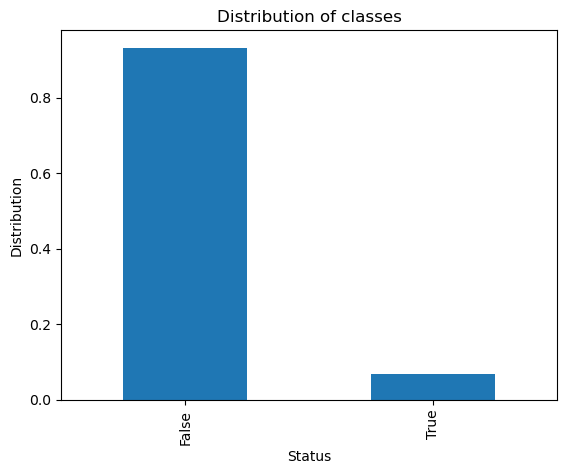

In [16]:
# to know the average counts of each Class, bankrupt or not

print(df_cut["status_label"].value_counts(normalize=True))
vals=df_cut["status_label"].value_counts(normalize=True)
vals.plot(kind = "bar", xlabel = "Status", ylabel = "Distribution",title = "Distribution of classes");

In [17]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8971 entries, C_1 to C_999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  8971 non-null   bool   
 1   year          8971 non-null   int64  
 2   X1            8971 non-null   float64
 3   X2            8971 non-null   float64
 4   X3            8971 non-null   float64
 5   X4            8971 non-null   float64
 6   X5            8971 non-null   float64
 7   X6            8971 non-null   float64
 8   X7            8971 non-null   float64
 9   X8            8971 non-null   float64
 10  X9            8971 non-null   float64
 11  X10           8971 non-null   float64
 12  X11           8971 non-null   float64
 13  X12           8971 non-null   float64
 14  X13           8971 non-null   float64
 15  X14           8971 non-null   float64
 16  X15           8971 non-null   float64
 17  X16           8971 non-null   float64
 18  X17           8971 non-null   

##### Let's see into one of the important features 
##### X6: Net Income: The overall profitability of a company after all expenses and costs have been deducted

In [19]:
df_cut["X6"].describe().apply("{0:,.0f}".format)

count      8,971
mean          97
std        1,123
min      -10,192
25%          -15
50%           -1
75%           21
max       59,531
Name: X6, dtype: object

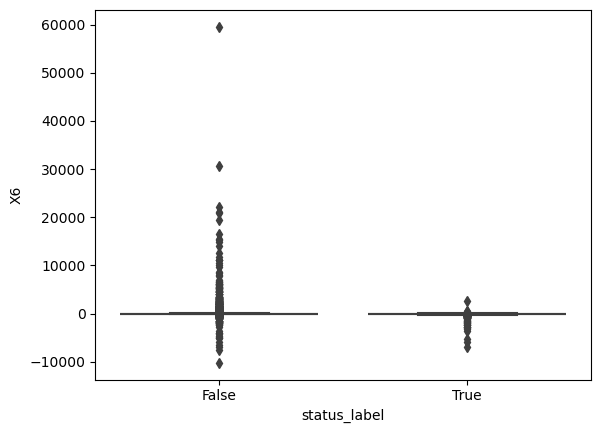

In [20]:
# Display on seasborn

sns.boxplot(x = "status_label", y = "X6", data = df_cut);

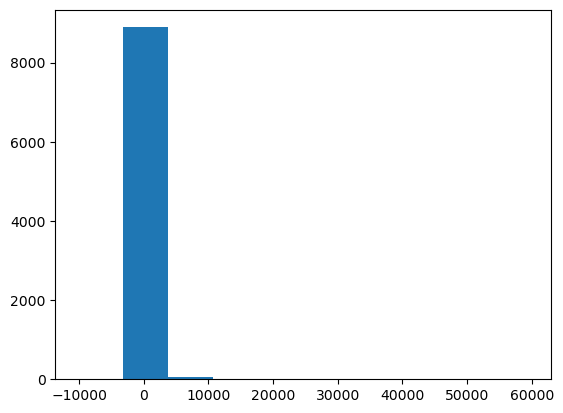

In [21]:
# check for skewed data
plt.hist(df_cut["X6"]);

In [22]:
# mask to remove outliers
q1, q9 = df_cut["X6"].quantile([0.02,0.98])
mask  = df_cut["X6"].between(q1, q9)
mask.head()

company_name
C_1        True
C_10       True
C_100      True
C_1000    False
C_1001     True
Name: X6, dtype: bool

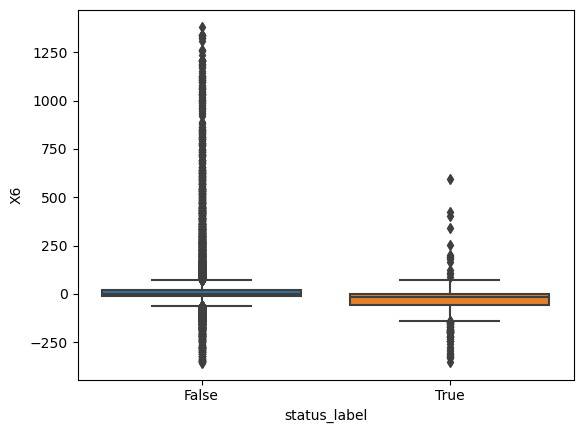

In [23]:
sns.boxplot(x = "status_label", y = "X6", data = df_cut[mask]);

**After removing outliers to balance the X6 feature, we can see from the chart that most companies that went bankrupt (Orange colour) due to this feature had lower profitability, unlike the companies that didin't.**

In [25]:
df_cut = df_cut[mask]
df_cut.head()

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
company_name,,,,,,,,,,,,,,,,,,,,
C_1,False,2017,942.700,1413.200,40.500,126.500,547.900,15.600,203.000,1551.4580,1748.300,1524.700,177.200,86.000,335.100,333.300,701.200,1748.300,588.400,1621.800
C_10,False,2018,924.991,2335.206,582.354,1356.041,294.094,511.047,400.988,9551.0904,3691.247,17664.202,4638.232,773.687,1356.041,1648.964,2593.475,3691.247,12315.497,2335.206
C_100,False,2013,87.342,62.127,33.174,65.532,5.295,18.496,25.753,459.0008,149.023,375.254,5.000,32.358,86.896,37.227,305.803,149.023,59.796,83.491
C_1001,False,2018,38465.000,202446.000,802.000,3816.000,16709.000,34.000,18246.000,22241.4000,214319.000,59672.000,7265.000,3014.000,11873.000,37626.000,10558.000,214319.000,49992.000,210503.000
C_1002,False,2018,60.189,53.948,1.234,3.513,18.427,2.190,11.792,72.2314,73.892,80.364,0.000,2.279,19.944,4.754,72.594,73.892,5.375,70.379


In [26]:
df_cut["X6"].describe().apply("{0:,.0f}".format)

count    8,611
mean        31
std        163
min       -356
25%        -14
50%         -1
75%         18
max      1,382
Name: X6, dtype: object

In [27]:
df_cut.tail()

,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
company_name,,,,,,,,,,,,,,,,,,,,
C_993,False,2001,22.953,21.335,14.080,27.801,0.000,7.954,8.228,95.0751,53.363,107.234,17.213,13.721,32.028,14.873,52.719,53.363,35.196,25.562
C_994,False,2018,7.568,11.074,1.776,3.629,0.000,2.974,0.261,79.7328,19.301,66.562,5.264,1.853,8.227,2.457,48.857,19.301,13.469,15.672
C_995,False,2005,1496.536,4245.911,167.547,201.550,633.657,-81.947,672.734,1512.8081,4901.115,2953.571,563.368,34.003,655.204,1346.399,654.274,4901.115,3140.893,4699.565
C_996,False,2001,62.788,74.934,3.346,-0.613,36.729,-4.989,25.152,7.0076,91.550,102.646,0.000,-3.959,16.616,75.197,20.945,91.550,77.640,92.163
C_997,False,2018,1479.900,2897.900,139.400,1081.500,786.300,933.400,518.100,19814.1360,5408.900,10256.400,4052.900,942.100,2511.000,2001.700,1400.300,5408.900,7074.200,4327.400


In [28]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8611 entries, C_1 to C_997
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  8611 non-null   bool   
 1   year          8611 non-null   int64  
 2   X1            8611 non-null   float64
 3   X2            8611 non-null   float64
 4   X3            8611 non-null   float64
 5   X4            8611 non-null   float64
 6   X5            8611 non-null   float64
 7   X6            8611 non-null   float64
 8   X7            8611 non-null   float64
 9   X8            8611 non-null   float64
 10  X9            8611 non-null   float64
 11  X10           8611 non-null   float64
 12  X11           8611 non-null   float64
 13  X12           8611 non-null   float64
 14  X13           8611 non-null   float64
 15  X14           8611 non-null   float64
 16  X15           8611 non-null   float64
 17  X16           8611 non-null   float64
 18  X17           8611 non-null   

### Data wrangling 

##### In this section, i will bring all that we have done above into one function for cleaning. This will also be helpful for anyone who would use the model to for testing/evaulation or to build a dashboard

In [31]:
# Bring All into one function
def wrangle(filename):
    # read the file
    df = pd.read_csv(filename).set_index("company_name")
    # to get only the last entry of that year
    df = df.groupby(df.index).last()
    # to turn alive to False (meaning the company didn't bankrupt, which will be the negative class)
    df["status_label"] = df["status_label"].apply(lambda x: False if x == 'alive' else True)
    # removing outliers on the X6 column
    q1, q9 = df["X6"].quantile([0.02,0.98])
    mask  = df["X6"].between(q1, q9)
    df = df[mask]
    
    # drop the year column
    df.drop(columns = "year", inplace = True)
    return df

In [32]:
df = wrangle("C:/Users/HP/Documents/Stephen/Data Science/American_Backruptcy/american_bankruptcy.csv")
df.head()

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
company_name,,,,,,,,,,,,,,,,,,,
C_1,False,942.700,1413.200,40.500,126.500,547.900,15.600,203.000,1551.4580,1748.300,1524.700,177.200,86.000,335.100,333.300,701.200,1748.300,588.400,1621.800
C_10,False,924.991,2335.206,582.354,1356.041,294.094,511.047,400.988,9551.0904,3691.247,17664.202,4638.232,773.687,1356.041,1648.964,2593.475,3691.247,12315.497,2335.206
C_100,False,87.342,62.127,33.174,65.532,5.295,18.496,25.753,459.0008,149.023,375.254,5.000,32.358,86.896,37.227,305.803,149.023,59.796,83.491
C_1001,False,38465.000,202446.000,802.000,3816.000,16709.000,34.000,18246.000,22241.4000,214319.000,59672.000,7265.000,3014.000,11873.000,37626.000,10558.000,214319.000,49992.000,210503.000
C_1002,False,60.189,53.948,1.234,3.513,18.427,2.190,11.792,72.2314,73.892,80.364,0.000,2.279,19.944,4.754,72.594,73.892,5.375,70.379


### Split
##### Here, i will split the dataset into training and testing data, then over-resample to the training data.
##### The target is the bankruptcy status.

In [34]:
target = "status_label"
X = df.drop(columns = target)
y = df[target]
y.shape

(8611,)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6888, 18)
(1723, 18)
(6888,)
(1723,)


In [36]:
over_sample = RandomOverSampler(random_state=42)
X_over_train, y_over_train = over_sample.fit_resample(X_train, y_train)
print(X_over_train.shape)
print(y_over_train.shape)

(12878, 18)
(12878,)


**To get the status fraction of each class (False - True)**

In [38]:
y_train.value_counts(normalize=True)

status_label
False    0.934814
True     0.065186
Name: proportion, dtype: float64

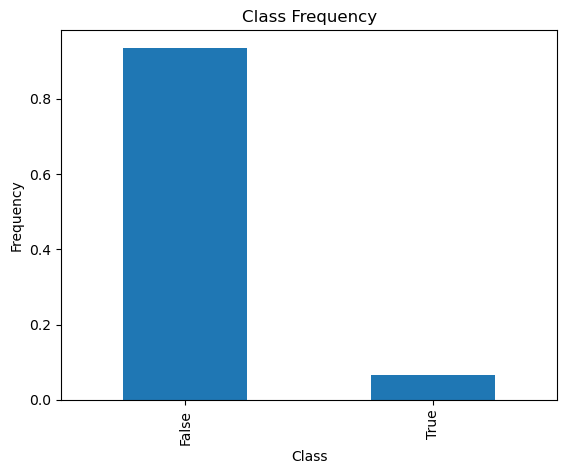

In [39]:
y_train.value_counts(normalize=True).plot(kind = "bar", title = "Class Frequency", xlabel = "Class", ylabel = "Frequency");

### Baseline
##### The baseline model score 

In [41]:
baseline = y_train.value_counts(normalize=True).max()
print(f"Baseline score: {baseline:.4f}")

Baseline score: 0.9348


### Iterate
##### In this section, i will build the two models, and their hyper params for tuning the data using GridSearchCV.

In [43]:
# Classifier one
clf1 = RandomForestClassifier()

# classifier two
clf2 = GradientBoostingClassifier()

# hyperparameters for both classifiers
params = {
    "n_estimators" : range(10,100,10),
    "max_depth" : range(2,13, 2)
          }

# defining the models
model1 = GridSearchCV(clf1, param_grid= params, n_jobs=-1, cv = 5, verbose=2)
model2 = GridSearchCV(clf2, param_grid= params, n_jobs=-1, cv = 5, verbose=2)

In [44]:
# trianing the first classifier model
model1.fit(X_over_train, y_over_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 13, 2),
                         'n_estimators': range(10, 100, 10)},
             verbose=2)

In [45]:
# training the second model
model2.fit(X_over_train, y_over_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 13, 2),
                         'n_estimators': range(10, 100, 10)},
             verbose=2)

In [46]:
# Getting the best parameters of the first model
model1.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=80)

In [47]:
# Getting the best parameters of the first model
model2.best_estimator_

GradientBoostingClassifier(max_depth=12, n_estimators=90)

### Evaluation

##### Let's see how the model performed by looking at the score and how our model is making its correct and incorrect predictions

In [49]:
# Getting the accuracy score for the first model seeing how it will perform on the training and test data
model1_acc_train = model1.score(X_over_train, y_over_train) 
model1_acc_test = model1.score(X_test, y_test) 

print(f"Training data accuracy score: {model1_acc_train:.4f}")
print(f"Testing data accuracy score: {model1_acc_test:.4f}")

Training data accuracy score: 0.9844
Testing data accuracy score: 0.8932


In [50]:
# Getting the accuracy score for the Second model seeing how it will perform on the training and test data
model2_acc_train = model2.score(X_over_train, y_over_train) 
model2_acc_test = model2.score(X_test, y_test) 

print(f"Training data accuracy score: {model2_acc_train:.4f}")
print(f"Testing data accuracy score: {model2_acc_test:.4f}")

Training data accuracy score: 1.0000
Testing data accuracy score: 0.9327


##### It can be seen that the GradientBoostingClassifier model gave a good accuracy score almost beating the baseline model score, but that doesn't tell the whole story about the result though. Yes, it really learnt the training data, and generalized well on the test data (data it has not seen).

##### I will use Confusion matrix to try to get more information about the model result and to see how our model is making its correct and incorrect predictions.

##### To better understand the values we'll see in the matrix, let's first count how many observations in our test set belong to the True and False classes.

In [53]:
y_test.value_counts()

status_label
False    1621
True      102
Name: count, dtype: int64

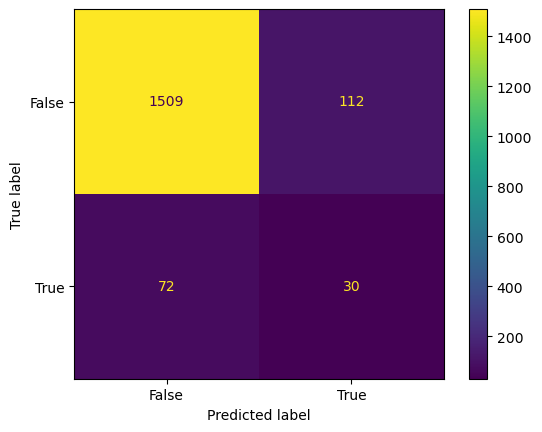

In [54]:
# the confusion matrix for the first model
ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test);

In [55]:
model_report = classification_report(y_test, model1.predict(X_test))
print(model_report)

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      1621
        True       0.21      0.29      0.25       102

    accuracy                           0.89      1723
   macro avg       0.58      0.61      0.59      1723
weighted avg       0.91      0.89      0.90      1723



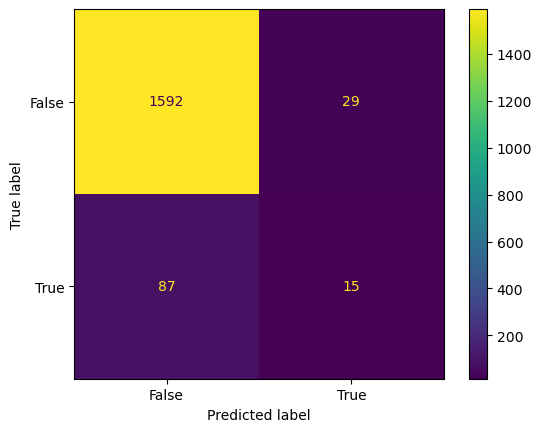

In [56]:
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test);

In [57]:
class_report = classification_report(y_test, model2.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

       False       0.95      0.98      0.96      1621
        True       0.34      0.15      0.21       102

    accuracy                           0.93      1723
   macro avg       0.64      0.56      0.59      1723
weighted avg       0.91      0.93      0.92      1723



#### These matrix is a great reminder of how imbalanced our data is, and of why accuracy isn't always the best metric for judging whether or not a model is giving us what we want. Given that most of the data in the dataset indicates that companies didn't go bankrupt, after all having an accuracy score of 89% and 93% is good enough, but it still doesn't tell the whole story
##### From the figures in the matrix above, the sum of the top row will give the number of companies that didn't go bankrupt which is **1509 + 112 = 1621"**, **"1592 + 29 = 1621"**, and the bottom row will give the number of companies that went/would go bankrupt which is **72 + 30 = 102**, **"87 + 15 = 102"** for the first and second model respectively, and .
##### This means that from the test dataset, the models could correctly predict that 1509/1621, 1592/1621 of the companies didn't go bankrupt and 112/1621, 29/1621 that it predicted would go bankrupt but didn't actually go bankrupt. Furthermore, the model correctly predicted that 30/102, 15/102 of the companies went bankrupt, and 72/102, 87/102 that it predicted would not go bankrupt, but actually went bankrupt

##### The result of the first model shows a better **recall percentage of 29%, which isc better than the second model**. It favours a *regulatory agency* who help companies and investors navigate bankrupty/insolvency proceedings. The recall tries measure how well the model identifies observations that belong to potentially-bankrupt companies. So that the agency can send debtors information about filing for legal protection before their company becomes insolvent. The administrative cost of sending the mails is a lot cheaper than the legal cost if the company doesn't file for protection before bankruptcy.

##### For example: If the Administrative cost of sending information is $$500" and legal cost if bankruptcy protection was not filed is $40000"
For the first model, that would be:
(Companies the model predicted would go bankrupt, but they did not): 117 * 500 = 56,000.
(Companies the model predicted would not go bankrupt, but they did): 72 * 40,000 = 2,880,000.
Total = $2,936,000

For the second model, that would be:
(Companies the model predicted would go bankrupt, but they did not): 29 * 500 = 14,500.
(Companies the model predicted would not go bankrupt, but they did): 87 * 40,000 = 3,480,000.
Total = $3,494,500.

## Communication

##### In this session, i will display the importance features that the models used to make it's prediction. Also visit the data dictionary to know the meaning of each column/features
##### I will also save the model for develops to use to make predictions.

In [60]:
# Gini importances for  model 1
features1 = X_over_train.columns
impt1 = model1.best_estimator_.feature_importances_
feat_imp1 = pd.Series(impt1, index = features1).sort_values()

# Gini importances for model 2
features2 = X_over_train.columns
impt2 = model2.best_estimator_.feature_importances_
feat_imp2 = pd.Series(impt2, index = features2).sort_values()

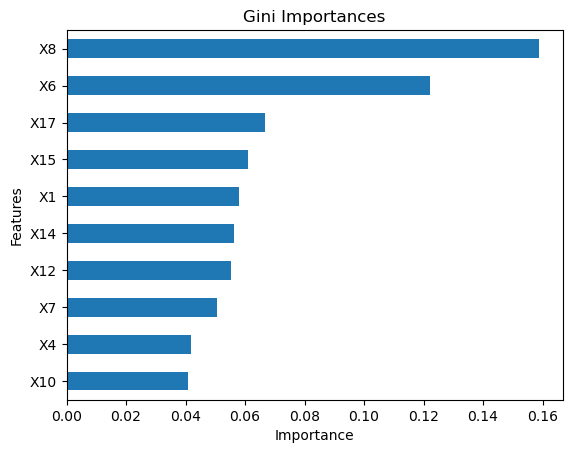

In [61]:
feat_imp1.tail(10).plot(kind = "barh", title = "Gini Importances", xlabel = "Importance", ylabel = "Features");

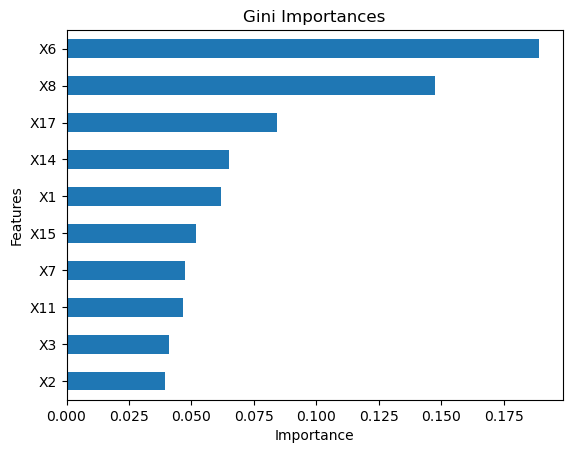

In [62]:
feat_imp2.tail(10).plot(kind = "barh", title = "Gini Importances", xlabel = "Importance", ylabel = "Features");

**Saving the model1**

In [64]:
with open("American_bankrupcy_model-rfc-0-1.pkl", "wb") as f:
    pickle.dump(model1, f)

**Testing running the module for developers**

In [66]:
X_test.to_csv("American_bankruptcy_testset.csv", index = True)

In [70]:
from American_bankrupcy_test_model import make_predictions
# Generate predictions
y_test_pred = make_predictions(
    data_filepath="C:/Users/HP/Documents/Stephen/DataScience_projects/American_bankruptcy_testset.csv",
    model_filepath="model-rfc-0-1.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (1723,)


company_name
C_238     False
C_2808    False
C_8519    False
C_3555    False
C_7186    False
Name: bankrupt, dtype: bool